# Predicting Gold Membership Signups Using Logistic Regression

## Problem Overview
The superstore is prepping for a high-stakes, year-end marketing campaign, a limited time Gold Membership offer: **20%** off all purchases for just \\$499 (usually \$999). But this offer isn’t for everyone, only existing customers, and the plan is to reach them through phone calls.

Now here’s the challenge: calling every customer eats up time, resources, and money. And not everyone will say yes.

So instead of calling blindly, the business wants to know:


**“Can we predict the kind of customers who are more likely to say yes to the offer and focus our efforts on them?”**

This is more than just guessing who’ll respond, it’s about data-driven marketing. Using past campaign data, i want to understand which customer traits lead to a positive response, and build a predictive model that helps the business call only the right people.

### Project Objectives

**🔹 Understand what drives customer engagement and spending behavior**

**🔹 Use logistic regression to predict who’s likely to say yes**

📘 [Read the story behind the data on my portfolio](https://globaldatapath.com/portfolio/predicting-gold-membership-signups-using-logistic-regression/)

🔗 [Connect with me on LinkedIn](https://www.linkedin.com/in/stephen-adeniran-oluwatimilehin/)

💻 [View the project notebook on GitHub](https://github.com/stephendatapath)


Let's Import all packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
data = pd.read_csv("superstore_data.csv")

In [3]:
data.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0


In [4]:
data.columns.to_list()

['Id',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Response',
 'Complain']

In [5]:
data.shape

(2240, 22)

The dataset contains 2,240 records and 22 columns, representing customer information, behaviors, and responses to marketing offers.

In [6]:
data.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [7]:
print(data.isnull().sum())

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


The dataset have 24 missing values in the Income column, we'd deal with this by removing the values.  

In [8]:
data = data.dropna(axis=0).reset_index(drop = True)

In [9]:
data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.150271,0.009477
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.357417,0.096907
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [10]:
data["Response"].value_counts()

Response
0    1883
1     333
Name: count, dtype: int64

The target variable "Response" is already a binary value, 1 means if customer accepted the offer in the last campaign, 0 means otherwise

Let's check the distribution of some variables in the dataset

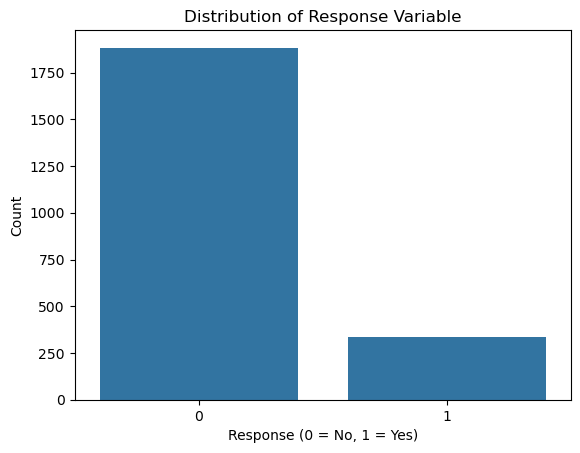

In [11]:
sns.countplot(x="Response", data=data)
plt.title("Distribution of Response Variable")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

There were **1,883 customers who didn’t respond** and **333 who responded** to the offer in the last campaign, meaning only about **15% gave a positive response**. This shows a class imbalance, and we’ll compare this baseline (15%) with the accuracy of our logistic regression model to see if it performs better than simply predicting all customers as non-responders.


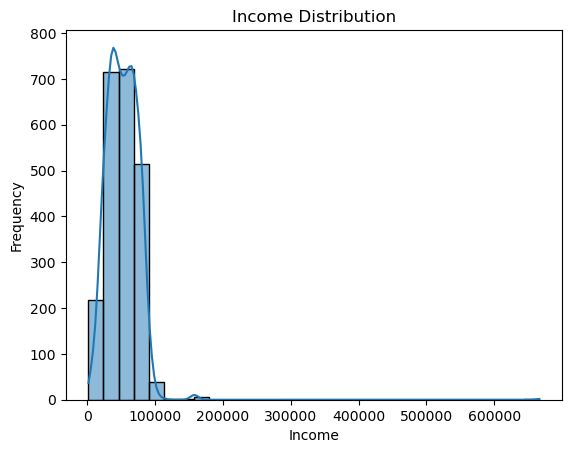

In [12]:
#income Distribution 

sns.histplot(data['Income'], bins=30, kde=True)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

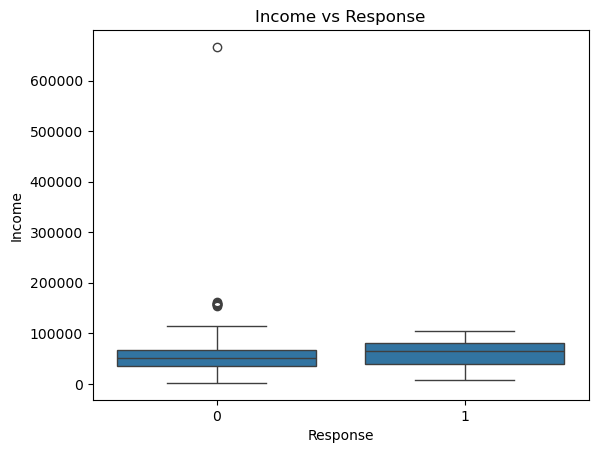

In [13]:
#Income by Responses 

sns.boxplot(x="Response", y="Income", data=data)
plt.title("Income vs Response")
plt.xlabel("Response")
plt.ylabel("Income")
plt.show()

Let's check the correlations of variable in the dataset

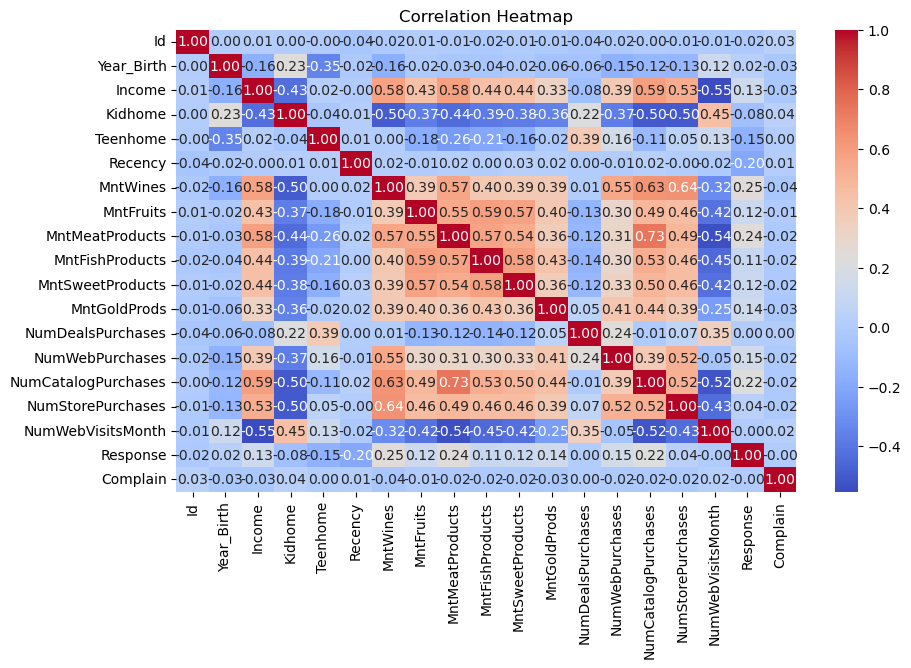

In [14]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

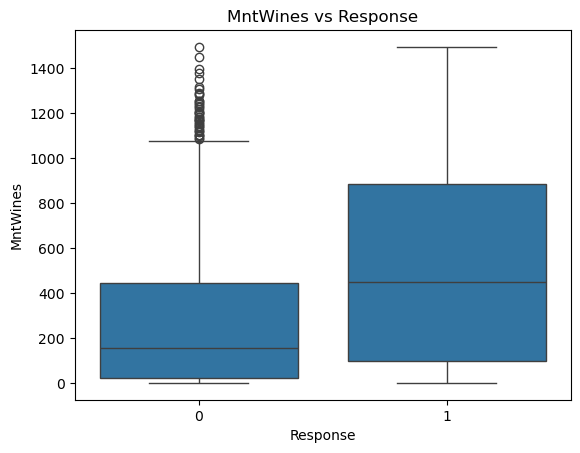

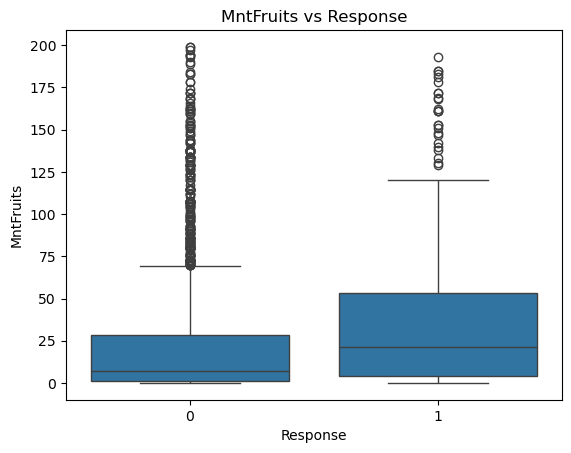

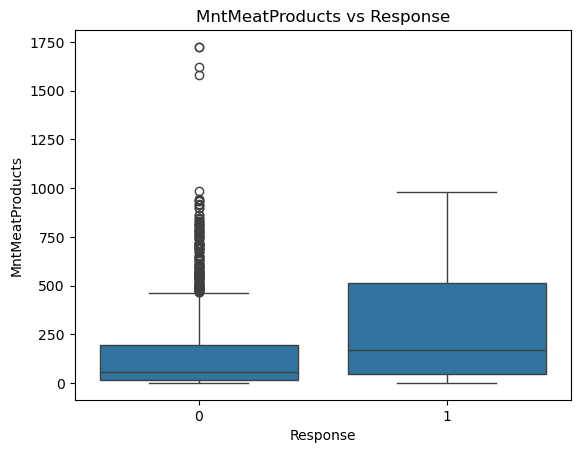

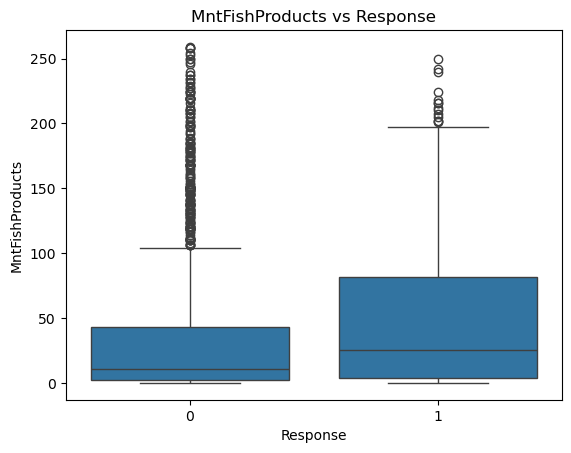

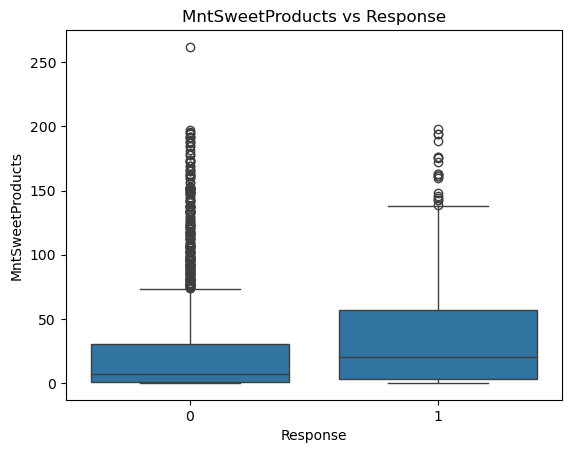

In [15]:
#Spending Patterns: Total Amounts vs Response
spending = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']

for col in spending:
    sns.boxplot(x='Response', y=col, data=data)
    plt.title(f"{col} vs Response")
    plt.show()

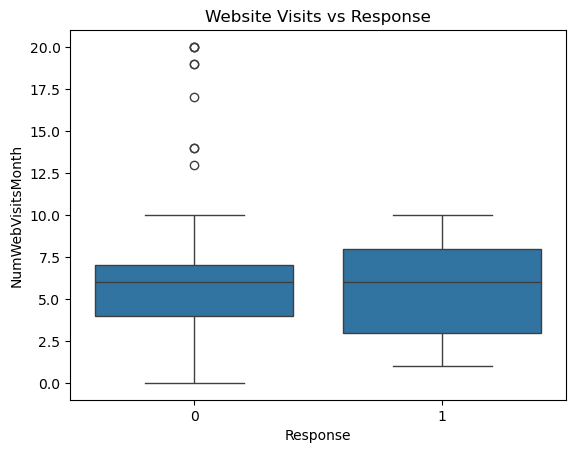

In [16]:
sns.boxplot(x='Response', y='NumWebVisitsMonth', data=data)
plt.title("Website Visits vs Response")
plt.show()

### Data preparation

Let's preapare the dataset by cleaning, transforming & encoding categorical variables, and selecting relevant features for modeling.

In [17]:
data_subset = data.copy()

In [18]:
data_subset['TotalChildren'] = data_subset['Kidhome'] + data_subset['Teenhome']

In [19]:
spending_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]
data_subset['TotalSpent'] = data_subset[spending_columns].sum(axis=1)

In [20]:
for col in spending_columns:
    col_ratio_name = f'{col}_Ratio'
    data_subset[col_ratio_name] = np.where(
        data_subset['TotalSpent'] > 0,
        data_subset[col] / data_subset['TotalSpent'],
        0
    )

In [21]:
purchase_columns = [
    'NumDealsPurchases', 'NumWebPurchases', 
    'NumCatalogPurchases', 'NumStorePurchases'
]
data_subset['TotalPurchases'] = data_subset[purchase_columns].sum(axis=1)

In [22]:
data_subset['OnlinePurchases'] = data_subset['NumWebPurchases'] + data_subset['NumCatalogPurchases']
data_subset['OfflinePurchases'] = data_subset['NumStorePurchases']

In [23]:
data_subset['DealPurchaseRatio'] = np.where(
    data_subset['TotalPurchases'] > 0,
    data_subset['NumDealsPurchases'] / data_subset['TotalPurchases'],
    0
)

In [24]:
data_subset['Dt_Customer'] = pd.to_datetime(data_subset['Dt_Customer'])

# Tenure (in days)
reference_date = data_subset['Dt_Customer'].max()
data_subset['TenureDays'] = (reference_date - data_subset['Dt_Customer']).dt.days

# Or convert it to months or years if preferred
data_subset['TenureMonths'] = data_subset['TenureDays'] // 30

In [25]:
data_subset['HouseholdSize'] = 1 + data_subset['TotalChildren']
data_subset['IncomePerPerson'] = data_subset['Income'] / data_subset['HouseholdSize']

In [26]:
data_subset["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [27]:
data_subset['Marital_Status'] = data_subset['Marital_Status'].replace({
    'Together': 'Partnered', 
    'Married': 'Partnered', 
    'Divorced': 'Single', 
    'Widow': 'Single', 
    'Alone': 'Single',
    'Absurd': 'Other',
    'YOLO': 'Other'
})

In [28]:
data_subset["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [29]:
education_map = {
    'Graduation': 1,     # Postgraduate
    'PhD': 1,            # Postgraduate
    'Master': 1,         # Postgraduate
    '2n Cycle': 0,       # Undergraduate
    'Basic': 0           # Undergraduate
}

In [30]:
cols_to_drop = [
    'Id', 'Year_Birth', 'Dt_Customer', 
    'Kidhome', 'Teenhome',  # already used in TotalChildren
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Education'
]
data_subset.drop(columns=cols_to_drop, inplace=True)


In [31]:
data_subset.head(10)

,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,...,MntSweetProducts_Ratio,MntGoldProds_Ratio,TotalPurchases,OnlinePurchases,OfflinePurchases,DealPurchaseRatio,TenureDays,TenureMonths,HouseholdSize,IncomePerPerson
0,Single,84835.0,0,189,104,379,111,189,218,1,...,0.158824,0.183193,15,8,6,0.066667,173,5,1,84835.000000
1,Single,57091.0,0,464,5,64,7,0,37,5,...,0.000000,0.064125,18,10,7,0.055556,174,5,1,57091.000000
2,Partnered,67267.0,0,134,11,59,15,2,30,2,...,0.007968,0.119522,11,5,5,0.090909,207,6,2,33633.500000
3,Partnered,32474.0,0,10,0,1,0,0,0,7,...,0.000000,0.000000,4,1,2,0.250000,31,1,3,10824.666667
4,Single,21474.0,0,6,16,24,11,0,34,7,...,0.000000,0.373626,8,4,2,0.250000,124,4,2,10737.000000
5,Single,71691.0,0,336,130,411,240,32,43,2,...,0.026846,0.036074,17,11,5,0.058824,264,8,1,71691.000000
6,Partnered,63564.0,0,769,80,252,15,34,65,6,...,0.027984,0.053498,28,20,7,0.035714,311,10,1,63564.000000
7,Partnered,44931.0,0,78,0,11,0,0,7,5,...,0.000000,0.072917,7,3,3,0.142857,322,10,2,22465.500000
8,Partnered,65324.0,0,384,0,102,21,32,5,4,...,0.058824,0.009191,20,8,9,0.150000,35,1,2,32662.000000
9,Partnered,65324.0,0,384,0,102,21,32,5,4,...,0.058824,0.009191,20,8,9,0.150000,35,1,2,32662.000000


In [32]:
data_subset.columns.to_list()

['Marital_Status',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumWebVisitsMonth',
 'Response',
 'Complain',
 'TotalChildren',
 'TotalSpent',
 'MntWines_Ratio',
 'MntFruits_Ratio',
 'MntMeatProducts_Ratio',
 'MntFishProducts_Ratio',
 'MntSweetProducts_Ratio',
 'MntGoldProds_Ratio',
 'TotalPurchases',
 'OnlinePurchases',
 'OfflinePurchases',
 'DealPurchaseRatio',
 'TenureDays',
 'TenureMonths',
 'HouseholdSize',
 'IncomePerPerson']

In [33]:
data_subset.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Response,...,MntSweetProducts_Ratio,MntGoldProds_Ratio,TotalPurchases,OnlinePurchases,OfflinePurchases,DealPurchaseRatio,TenureDays,TenureMonths,HouseholdSize,IncomePerPerson
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,5.319043,0.150271,...,0.050749,0.120167,14.880866,6.756318,5.800993,0.180252,512.006318,16.607852,1.947202,33848.909446
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,2.425359,0.357417,...,0.060915,0.108892,7.670957,4.720753,3.250785,0.111208,232.469034,7.738568,0.749062,25912.847005
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1223.500000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,3.000000,0.000000,...,0.008629,0.038081,8.000000,2.000000,3.000000,0.076923,340.000000,11.000000,1.000000,15408.375000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,6.000000,0.000000,...,0.033333,0.085941,15.000000,6.000000,5.000000,0.166667,513.000000,17.000000,2.000000,24752.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,7.000000,0.000000,...,0.070411,0.169912,21.000000,10.000000,8.000000,0.250000,686.000000,22.000000,2.000000,39026.500000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,20.000000,1.000000,...,0.945848,0.894150,44.000000,28.000000,13.000000,1.000000,1063.000000,35.000000,4.000000,333333.000000


### Let's build the Logistic regression model

In [34]:
model_data = data_subset.dropna()
model_data = pd.get_dummies(model_data, columns=["Marital_Status"], drop_first=True)
X = model_data.drop(columns=["Response"])
y = model_data['Response']

Lets split the data into training and holdout datasets. 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42, stratify=y)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
clf = LogisticRegression(max_iter=2000, random_state=42)


In [38]:
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [39]:
clf.coef_

array([[-0.72655753, -0.83276535,  0.97579811,  0.08708035, -0.68767879,
         0.13380163,  0.02837537, -0.12018827,  0.31000087, -0.03732333,
         0.06054618,  0.29662949, -0.39838194, -0.13972801,  0.59093225,
        -0.49365834,  0.02592733,  0.56208822,  0.0762435 ,  0.54978048,
        -0.58860591,  0.41830912,  0.33569247,  0.17306215,  0.06054618,
         1.49902293, -0.69103532, -0.15608509]])

In [40]:
clf.intercept_

array([-2.62066514])

In [41]:
# 7. Predict
y_pred = clf.predict(X_test_scaled)

In [42]:
#Let's check the probability that was predicted for each data point. 
y_predict_proba = clf.predict_proba(X_test_scaled) [::, -1]

In [43]:
# Show top 10 customers with highest probability
top_customers = pd.DataFrame({
    "CustomerID": X_test.index,
    "Probability_Positive": y_predict_proba
}).sort_values(by="Probability_Positive", ascending=False)

print(top_customers.head(10))

     CustomerID  Probability_Positive
369         917              0.964638
593         209              0.960948
588          77              0.955344
246         255              0.954657
230          14              0.953757
634        1404              0.929037
43          222              0.924585
161         107              0.909621
332         289              0.905984
529        1183              0.893534


### MODEL EVALUATION

In [44]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8676691729323308


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       565
           1       0.59      0.39      0.47       100

    accuracy                           0.87       665
   macro avg       0.74      0.67      0.70       665
weighted avg       0.85      0.87      0.86       665



confusion matrix

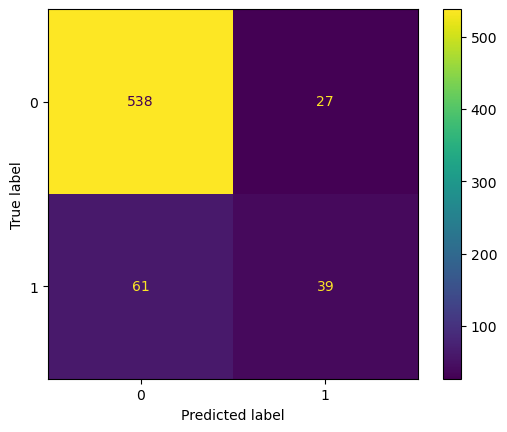

In [46]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

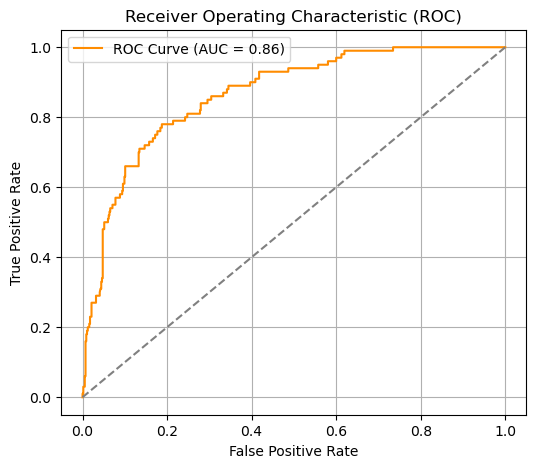

In [47]:
# Let's calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba)
roc_auc = roc_auc_score(y_test, y_predict_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.grid()
plt.show()

The ROC Curve shows an AUC of **0.86**, which means the model does a great job at distinguishing between responders and non-responders. A perfect model scores 1.0, and anything above 0.80 is considered strong, so this gives confidence that the model is reliably ranking customers based on their likelihood to respond.


In [48]:
# Show top 10 customers with highest probability
top_customers = pd.DataFrame({
    "CustomerID": X_test.index,
    "Probability_Positive": y_predict_proba
}).sort_values(by="Probability_Positive", ascending=False)

print(top_customers.head(10))

     CustomerID  Probability_Positive
369         917              0.964638
593         209              0.960948
588          77              0.955344
246         255              0.954657
230          14              0.953757
634        1404              0.929037
43          222              0.924585
161         107              0.909621
332         289              0.905984
529        1183              0.893534


In [49]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': clf.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coefficients)

                     Feature  Coefficient
25           IncomePerPerson     1.499023
2                   MntWines     0.975798
1                    Recency    -0.832765
0                     Income    -0.726558
26  Marital_Status_Partnered    -0.691035
4            MntMeatProducts    -0.687679
14     MntMeatProducts_Ratio     0.590932
20          OfflinePurchases    -0.588606
17        MntGoldProds_Ratio     0.562088
19           OnlinePurchases     0.549780
15     MntFishProducts_Ratio    -0.493658
21         DealPurchaseRatio     0.418309
12            MntWines_Ratio    -0.398382
22                TenureDays     0.335692
8          NumWebVisitsMonth     0.310001
11                TotalSpent     0.296629
23              TenureMonths     0.173062
27     Marital_Status_Single    -0.156085
13           MntFruits_Ratio    -0.139728
5            MntFishProducts     0.133802
7               MntGoldProds    -0.120188
3                  MntFruits     0.087080
18            TotalPurchases     0

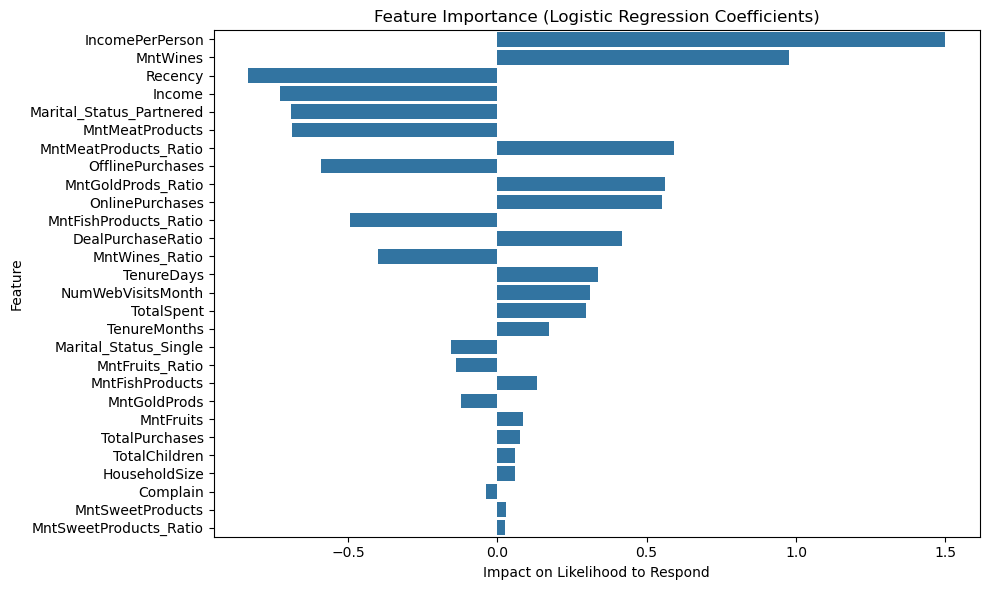

In [50]:
# Sort by absolute value of coefficients
coefficients['Abs_Coeff'] = coefficients['Coefficient'].abs()
coefficients_sorted = coefficients.sort_values(by='Abs_Coeff', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_sorted)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Impact on Likelihood to Respond")
plt.tight_layout()
plt.savefig("feature_importance_bar_chart.png", dpi=300, bbox_inches='tight')
plt.show()

<Axes: xlabel='IncomePerPerson', ylabel='Response'>

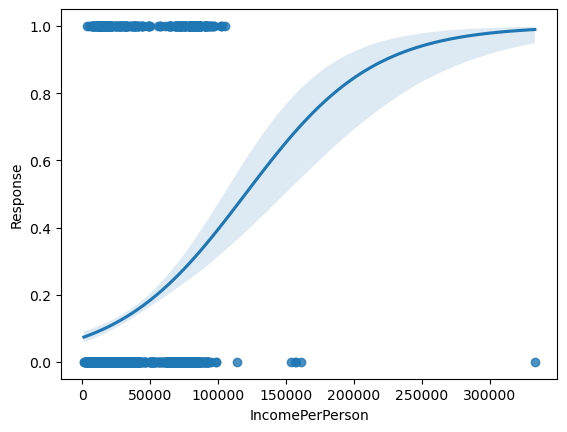

In [51]:
sns.regplot(x="IncomePerPerson", y="Response", data=data_subset, logistic=True)

This chart clearly shows that as an individual's income per household member goes up, their chances of responding to the offer increase significantly. We see a big jump in responses, especially from households where the income per person is around \$75,000 to \\$200,000. This tells us that focusing our marketing on these segments will likely lead to much better results and more efficient spending.